## Context
The Iris flower dataset is a multivariate dataset introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

### Data Information
The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

### Objective 
The task is apply PCA on the IRIS dataset and reduce the number of features.

### Load the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11,8)})

In [2]:
data=pd.read_csv("iris.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## PCA
We see that data almost always comes with information, redundancy, and noise. We always aim to extract the maximum possible information from the data while reducing the noise and ignoring the redundant information. This forms the goal of PCA.

Principal components analysis (PCA) is a dimensionality reduction technique that enables you to identify correlations and patterns in a data set so that it can be transformed into a data set of significantly lower dimension without loss of any important information.

## Steps for calculating PCA

#### Step 1:Standardize the data (if needed)
#### Step 2:Calculate the Covariance Matrix
#### Step 3:Compute Eigenvalues and EigenVectors for the Covariance matrix
#### Step 4:Selecting Number of components using Explained Variance
#### Step 5:Projecting the data into lower dimensions.

<hr>

### Step 1:Standardize the data

The PCA works on maximizing the variance.It projects the original data into directions which maximize the variance. So we should standardized the variables before applying PCA because it will give more importance to those variables having higher variances than to those variables with very low variances while identifying the right principle component. If you Standardize the data, all variables have the same standard deviation, thus all variables have the same weight and your PCA calculates relevant axis.

In [4]:
#We don't need target variable for pca so we are dropping them.
X=data.drop(['species'],axis=1) 
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


To standardize a variable,use the following formula:

$ Z=\frac{X-\mu}{\sigma} $

In sklearn we have standard scaler which can be used for standardizing the data.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [5]:
#Import standardscaler
from sklearn.preprocessing import StandardScaler 

#Create an object of the standardscaler.
scaler=StandardScaler() 

#Fit to data for computing the mean and std, then transform it.
X=scaler.fit_transform(X) 

In [6]:
X=pd.DataFrame(X,columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


### Step 2:Calculate the Covariance Matrix

Variance and Covariance are a measure of the spread of data around their mean. For PCA We need to study the relationships between the variables involved in a dataset, to be able to create new variables that can reduce the number of original values, without compromising on the information contained in them. The new variables are formed on the basis of correlations between the original variables.A covariance matrix expresses the relationship between the different variables in the dataset.Covariance is measured between 2 dimensions to see if there is a relationship between the 2 dimensions for example discount & Number of sales. The covariance with itself is the variance.

Mathematically the covariance can be calculated using,
$$ cov(X,Y)=\frac{\sum_{i=1}^{N}(X_{i}-\bar{X})(X_{i}-\bar{Y})}{N-1} $$
Note: Here Y doesn't mean dependent variable.

The Covariance matrix is a p × p matrix, where p represents the dimensions or features of the dataset. Each entry in the matrix represents the covariance of the corresponding variables.

For example the covariance matrix for the iris data is,
\begin{equation*} 
\begin{pmatrix}
cov(sepal\ length,sepal\ length) & cov(sepal\ length,sepal\ width) & cov(sepal\ length,petal\ length) &cov(sepal\ length,petal\ width) \\
cov(sepal\ width,sepal\ length) & cov(sepal\ width,sepal\ width) & cov(sepal\ width,petal\ length) &cov(sepal\ width,petal\ width)  \\
cov(petal\ length,sepal\ length) & cov(petal\ length,sepal width) & cov(petal\ length,petal\ length) &cov(petal\ length,petal\ width)  \\
cov(petal\ width,sepal\ length) & cov(petal\ width,sepal\ width) & cov(petal\ width,petal\ length) &cov(petal\ width,petal\ width) 
\end{pmatrix}
\end{equation*}


The Numpy cov() is used to calculate the covariance https://numpy.org/doc/stable/reference/generated/numpy.cov.html.

In [7]:
# Calculating the covariance matrix
Cov_matrix=np.cov(X.T) 

In [8]:
Cov_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

### Step 3:Compute Eigenvalues and EigenVectors

The covariance matrix which we have calculated is then decomposed into eigenvalues and eigenvectors. Eigenvectors are those vectors when a linear transformation is performed on them, their direction does not change. They don’t change their direction they just scale the vector upwards or downwards. The value at which it scales is called the eigenvalue usually denoted by lambda.<br> 
Mathematically,       
$$ AV=\lambda V $$
- A is a Transformation matrix. In our case its a Covariance matrix
- V is an eigenvector.
- $\lambda$ is an eigenvalue.

For every eigenvector there is an eigenvalue.  Eigenvectors Understands the directions of the spread of our data and Eigenvalues helps in bringing out the relative importance of these directions.

We can find eigenvalues and eigenvector using numpy with linalg.eig method https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html.

In [9]:
# Calculating Eigenvalues and Eigenvectors
eigen_values, eigen_vectors=np.linalg.eig(Cov_matrix) 

In [10]:
eigen_values

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [11]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

### Step 4:Selecting Number of components using Explained Variance

The desired goal is to reduce the dimensions of a d-dimensional dataset by projecting it onto a (k)-dimensional subspace (where k<d) in order to increase the computational efficiency while retaining most of the information.

For the above example d=4 so we need to select k which is less than d. We call the k as principal components. So the important question is what is the size of k that represents the data well?

We have got the eigenvalues and eigenvectors.Here we are going to find the number of components(k) which can explain maximum amount of variance.

As we have 4 predictors here, we got 4 eigenvalues.

In [12]:
variance_explained= [(i/sum(eigen_values))*100 for i in eigen_values]  #Gives contribution of each eigen value
variance_explained

[72.77045209380132, 23.03052326768065, 3.6838319576273864, 0.5151926808906394]

Here we can see that the first component explains 72% variance of the data.

In [13]:
cumulative_variance_explained= np.cumsum(variance_explained) #Gives contribution of eigen value in cumulative manner
cumulative_variance_explained

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

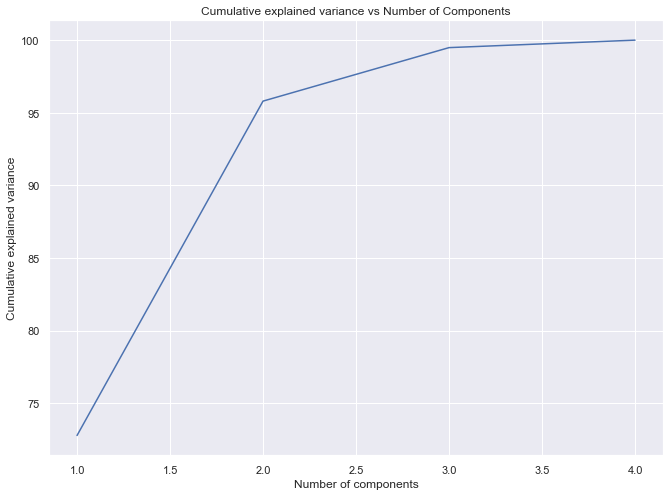

In [14]:
plt.plot([1,2,3,4],cumulative_variance_explained)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Cumulative explained variance vs Number of Components")
plt.show()

From the above graph we can see that the **first two components** is enough to explain more than 95% variance in the data. So, we can now project our data into two components instead of 4, thereby reducing the dimension of data, of course with a minor loss in information.

### Step 5:Projecting the data into lower dimensions.

The last step in performing PCA is to re-arrange the original data with the final principal components which represent the maximum and the most significant information of the data set. In order to replace the original data axis with the newly formed Principal Components, you simply multiply the transpose of the original data set by the transpose of the obtained feature vector.

In [15]:
Number_of_principal_components=2 #Select the number of principal components 
projection_matrix= (eigen_vectors.T[:][:])[:Number_of_principal_components].T #Selecting the first two eigenvectors.
projection_matrix

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [16]:
 #Creating New Features
X_pca=X.dot(projection_matrix)

In [17]:
#Creating the dataframe for the tranformed columns.
final=pd.DataFrame(X_pca)
final.columns=['pc1','pc2']
final['target']=data['species']

In [18]:
final

,pc1,pc2,target
0,-2.264542,-0.505704,Iris-setosa
1,-2.086426,0.655405,Iris-setosa
2,-2.367950,0.318477,Iris-setosa
3,-2.304197,0.575368,Iris-setosa
4,-2.388777,-0.674767,Iris-setosa
...,...,...,...
145,1.870522,-0.382822,Iris-virginica
146,1.558492,0.905314,Iris-virginica
147,1.520845,-0.266795,Iris-virginica
148,1.376391,-1.016362,Iris-virginica


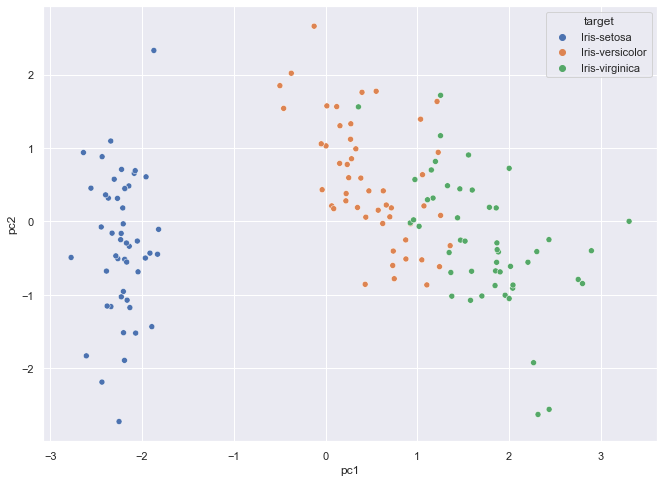

In [19]:
sns.scatterplot(x='pc1',y='pc2',data=final,hue='target')
plt.show()

## PCA with Sklearn

Don't worry its not required to write above code for performing PCA always. All these steps have a straight-forward implementation in Python sklearn package for PCA

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.

- **Note:** Its important to standardize the data whichever method you are following. So the Step-1 is common for both the methods. 

In [20]:
#Import PCA
from sklearn.decomposition import PCA #Import PCA
#Select number of components
pca = PCA(n_components=2) 
#Fit the data 
pca_X= pca.fit_transform(X) 

In [21]:
pca_sklearn=pd.DataFrame(X_pca,columns=['pc1','pc2'])
pca_sklearn['target']=data['species']
pca_sklearn

,pc1,pc2,target
0,-2.264542,-0.505704,Iris-setosa
1,-2.086426,0.655405,Iris-setosa
2,-2.367950,0.318477,Iris-setosa
3,-2.304197,0.575368,Iris-setosa
4,-2.388777,-0.674767,Iris-setosa
...,...,...,...
145,1.870522,-0.382822,Iris-virginica
146,1.558492,0.905314,Iris-virginica
147,1.520845,-0.266795,Iris-virginica
148,1.376391,-1.016362,Iris-virginica


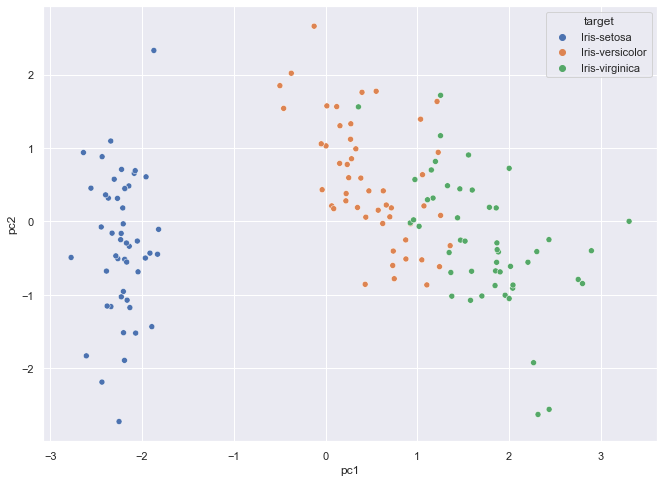

In [22]:
sns.scatterplot(x='pc1',y='pc2',data=pca_sklearn,hue='target')
plt.show()

We can see that the results are same using sklearn and with numpy.